In [5]:
from scipy.ndimage import label
def is_broken(mask):
    labeled_array, num_features = label(mask==255)
    if num_features <= 1:
        return False
    total_area = np.sum(mask==255)
    largest_area = 0
    for i in range(1, num_features+1):
        area = np.sum(labeled_array==i)
        if area > largest_area:
            largest_area = area
    if largest_area / total_area < 0.8:
        return True
    return False

In [2]:
import os

p_train = "/data/chaksu/Train"
p_test = "/data/chaksu/Test"

#create a dict with d[folder_name][sub_folder_name] = len(files in sub_folder_name)
data_dict_train = {}
for folder_name in os.listdir(p_train):
    folder_path = os.path.join(p_train, folder_name)
    if os.path.isdir(folder_path):
        data_dict_train[folder_name] = {}
        for sub_folder_name in os.listdir(folder_path):
            sub_folder_path = os.path.join(folder_path, sub_folder_name)
            if os.path.isdir(sub_folder_path):
                num_files = len(os.listdir(sub_folder_path))
                data_dict_train[folder_name][sub_folder_name] = num_files
data_dict_test = {}
for folder_name in os.listdir(p_test):
    folder_path = os.path.join(p_test, folder_name)
    if os.path.isdir(folder_path):
        data_dict_test[folder_name] = {}
        for sub_folder_name in os.listdir(folder_path):
            sub_folder_path = os.path.join(folder_path, sub_folder_name)
            if os.path.isdir(sub_folder_path):
                num_files = len(os.listdir(sub_folder_path))
                data_dict_test[folder_name][sub_folder_name] = num_files
print("Train data distribution:")
for folder_name, sub_folders in data_dict_train.items():
    print(f"Folder: {folder_name}")
    for sub_folder_name, num_files in sub_folders.items():
        print(f"  Sub-folder: {sub_folder_name}, Number of files: {num_files}")
print("\nTest data distribution:")
for folder_name, sub_folders in data_dict_test.items():
    print(f"Folder: {folder_name}")
    for sub_folder_name, num_files in sub_folders.items():
        print(f"  Sub-folder: {sub_folder_name}, Number of files: {num_files}")

Train data distribution:
Folder: 2.0_Doctors_Annotations
  Sub-folder: Expert 2, Number of files: 4
  Sub-folder: Expert 5, Number of files: 4
  Sub-folder: Expert 4, Number of files: 4
  Sub-folder: Expert 3, Number of files: 3
  Sub-folder: Expert 1, Number of files: 4
Folder: 3.0_Doctors_Annotations_Binary_OD_OC
  Sub-folder: Expert 2, Number of files: 4
  Sub-folder: Expert 5, Number of files: 4
  Sub-folder: Expert 4, Number of files: 4
  Sub-folder: Expert 3, Number of files: 4
  Sub-folder: Expert 1, Number of files: 4
Folder: 4.0_OD_CO_Fusion_Images
  Sub-folder: Expert 2, Number of files: 4
  Sub-folder: Expert 5, Number of files: 4
  Sub-folder: Expert 4, Number of files: 4
  Sub-folder: Expert 3, Number of files: 4
  Sub-folder: Forus, Number of files: 5
  Sub-folder: Remidio, Number of files: 5
  Sub-folder: Expert 1, Number of files: 4
  Sub-folder: Bosch, Number of files: 5
Folder: 5.0_OD_OC_Mean_Median_Majority_STAPLE
  Sub-folder: Forus, Number of files: 3
  Sub-folder:

In [70]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import tqdm
import numpy as np
p = "/data/chaksu/Train/3.0_Doctors_Annotations_Binary_OD_OC"
broken_images = {"machine": [],"expert_name": [],"file_name": [],"cup": [],"disc": []}
machines = ["Bosch","Forus","Remidio"]
for expert_name in os.listdir(p):
    if not "Expert" in expert_name:
        continue
    for machine in machines:
        files = os.listdir(os.path.join(p, expert_name, machine, "Cup"))
        for f in tqdm.tqdm(files):
            if not f.endswith(".png"):
                continue
            cup = np.array(Image.open(os.path.join(p, expert_name, machine, "Cup", f)))
            disc = np.array(Image.open(os.path.join(p, expert_name, machine, "Disc", f)))
            if cup.ndim==3:
                cup = cup[:,:,0]
            if disc.ndim==3:
                disc = disc[:,:,0]
            #assert all pixels in cup are also in disc
            if not np.all((cup == 255) <= (disc == 255)):
                print(f"Error in {expert_name}/{machine}/{f}")
                broken_images["machine"].append(machine)
                broken_images["expert_name"].append(expert_name)
                broken_images["file_name"].append(f)
                broken_images["cup"].append(cup)
                broken_images["disc"].append(disc)

100%|██████████| 105/105 [00:01<00:00, 101.03it/s]


Error in Expert 2/Bosch/Image145.png


 19%|█▉        | 153/811 [00:04<00:20, 32.46it/s]

Error in Expert 2/Remidio/IMG_2702.png


 29%|██▉       | 237/811 [00:07<00:17, 33.62it/s]

Error in Expert 2/Remidio/IMG_3533.png


 22%|██▏       | 23/105 [00:00<00:00, 107.24it/s]

Error in Expert 5/Bosch/Image142.png
Error in Expert 5/Bosch/P5_Image2.png
Error in Expert 5/Bosch/Image118.png


 43%|████▎     | 45/105 [00:00<00:00, 103.89it/s]

Error in Expert 5/Bosch/Image134.png


100%|██████████| 105/105 [00:01<00:00, 102.43it/s]


Error in Expert 5/Bosch/P3_Image2.png
Error in Expert 5/Bosch/Image187.png
Error in Expert 5/Bosch/Image179.png


  0%|          | 0/96 [00:00<?, ?it/s]

Error in Expert 5/Forus/62.png


 21%|██        | 20/96 [00:00<00:00, 91.25it/s]

Error in Expert 5/Forus/63.png


 41%|████      | 39/96 [00:00<00:00, 89.10it/s]

Error in Expert 5/Forus/93.png
Error in Expert 5/Forus/85.png
Error in Expert 5/Forus/5.png


 69%|██████▉   | 66/96 [00:00<00:00, 87.14it/s]

Error in Expert 5/Forus/7.png
Error in Expert 5/Forus/26.png
Error in Expert 5/Forus/27.png
Error in Expert 5/Forus/31.png
Error in Expert 5/Forus/34.png
Error in Expert 5/Forus/20.png


 88%|████████▊ | 84/96 [00:00<00:00, 87.16it/s]

Error in Expert 5/Forus/23.png
Error in Expert 5/Forus/38.png


 25%|██▌       | 204/810 [00:05<00:17, 33.80it/s]

Error in Expert 5/Remidio/IMG_3446.png


 44%|████▍     | 360/810 [00:10<00:13, 33.82it/s]

Error in Expert 5/Remidio/IMG_3442.png


 56%|█████▌    | 452/810 [00:13<00:10, 34.48it/s]

Error in Expert 5/Remidio/IMG_2550.png


 82%|████████▏ | 668/810 [00:19<00:04, 34.33it/s]

Error in Expert 5/Remidio/IMG_3348.png


 98%|█████████▊| 796/810 [00:23<00:00, 33.46it/s]

Error in Expert 5/Remidio/IMG_2698.png
Error in Expert 5/Remidio/IMG_3431.png


100%|██████████| 810/810 [00:23<00:00, 34.06it/s]


Error in Expert 5/Remidio/IMG_2505.png


 32%|███▏      | 34/105 [00:00<00:00, 104.44it/s]

Error in Expert 4/Bosch/P2_Image1.png
Error in Expert 4/Bosch/Image119.png
Error in Expert 4/Bosch/Image135.png


 54%|█████▍    | 436/810 [00:13<00:11, 33.12it/s]

Error in Expert 4/Remidio/IMG_2801.png


 21%|██        | 22/105 [00:00<00:00, 105.43it/s]

Error in Expert 3/Bosch/Image153.png
Error in Expert 3/Bosch/Image154.png


 31%|███▏      | 33/105 [00:00<00:00, 102.31it/s]

Error in Expert 3/Bosch/Image132.png


 94%|█████████▍| 99/105 [00:00<00:00, 100.50it/s]

Error in Expert 3/Bosch/Image162.png


 35%|███▌      | 284/810 [00:08<00:15, 33.46it/s]

Error in Expert 3/Remidio/IMG_3534.png


 47%|████▋     | 384/810 [00:11<00:12, 33.64it/s]

Error in Expert 3/Remidio/IMG_2802.png


 50%|█████     | 408/810 [00:12<00:11, 34.28it/s]

Error in Expert 3/Remidio/IMG_2546.png


 54%|█████▍    | 436/810 [00:13<00:11, 33.78it/s]

Error in Expert 3/Remidio/IMG_2801.png


 56%|█████▌    | 452/810 [00:13<00:10, 33.62it/s]

Error in Expert 3/Remidio/IMG_2544.png


 57%|█████▋    | 460/810 [00:13<00:10, 33.73it/s]

Error in Expert 3/Remidio/IMG_2545.png


 63%|██████▎   | 512/810 [00:15<00:08, 34.21it/s]

Error in Expert 3/Remidio/IMG_2540.png


 69%|██████▊   | 556/810 [00:16<00:07, 34.23it/s]

Error in Expert 3/Remidio/IMG_2542.png
Error in Expert 3/Remidio/IMG_2543.png


 21%|██        | 22/105 [00:00<00:00, 106.16it/s]

Error in Expert 1/Bosch/Image142.png
Error in Expert 1/Bosch/P5_Image2.png
Error in Expert 1/Bosch/Image118.png


 42%|████▏     | 44/105 [00:00<00:00, 102.02it/s]

Error in Expert 1/Bosch/Image134.png


100%|██████████| 105/105 [00:01<00:00, 98.68it/s]


Error in Expert 1/Bosch/P3_Image2.png
Error in Expert 1/Bosch/Image187.png
Error in Expert 1/Bosch/Image179.png


  0%|          | 0/96 [00:00<?, ?it/s]

Error in Expert 1/Forus/62.png


 21%|██        | 20/96 [00:00<00:00, 85.62it/s]

Error in Expert 1/Forus/63.png


 40%|███▉      | 38/96 [00:00<00:00, 83.82it/s]

Error in Expert 1/Forus/93.png
Error in Expert 1/Forus/85.png
Error in Expert 1/Forus/5.png


 68%|██████▊   | 65/96 [00:00<00:00, 82.61it/s]

Error in Expert 1/Forus/7.png
Error in Expert 1/Forus/26.png
Error in Expert 1/Forus/27.png
Error in Expert 1/Forus/31.png
Error in Expert 1/Forus/34.png
Error in Expert 1/Forus/20.png


 86%|████████▋ | 83/96 [00:00<00:00, 83.76it/s]

Error in Expert 1/Forus/23.png
Error in Expert 1/Forus/38.png


 98%|█████████▊| 797/811 [00:23<00:00, 33.54it/s]

Error in Expert 1/Remidio/IMG_2698.png


100%|██████████| 811/811 [00:24<00:00, 33.68it/s]


(array([ 3.,  0., 27.,  0.,  0.,  4.,  0., 13.,  0., 21.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

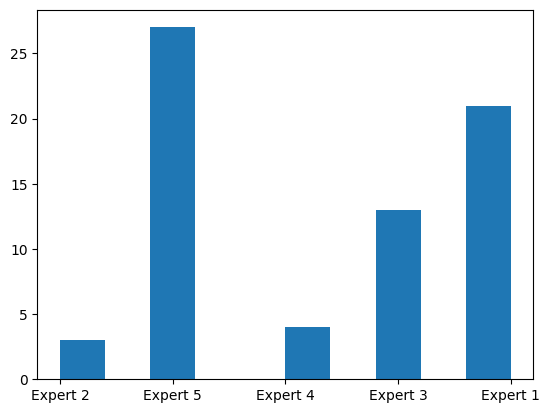

In [18]:
plt.hist(broken_images["expert_name"])

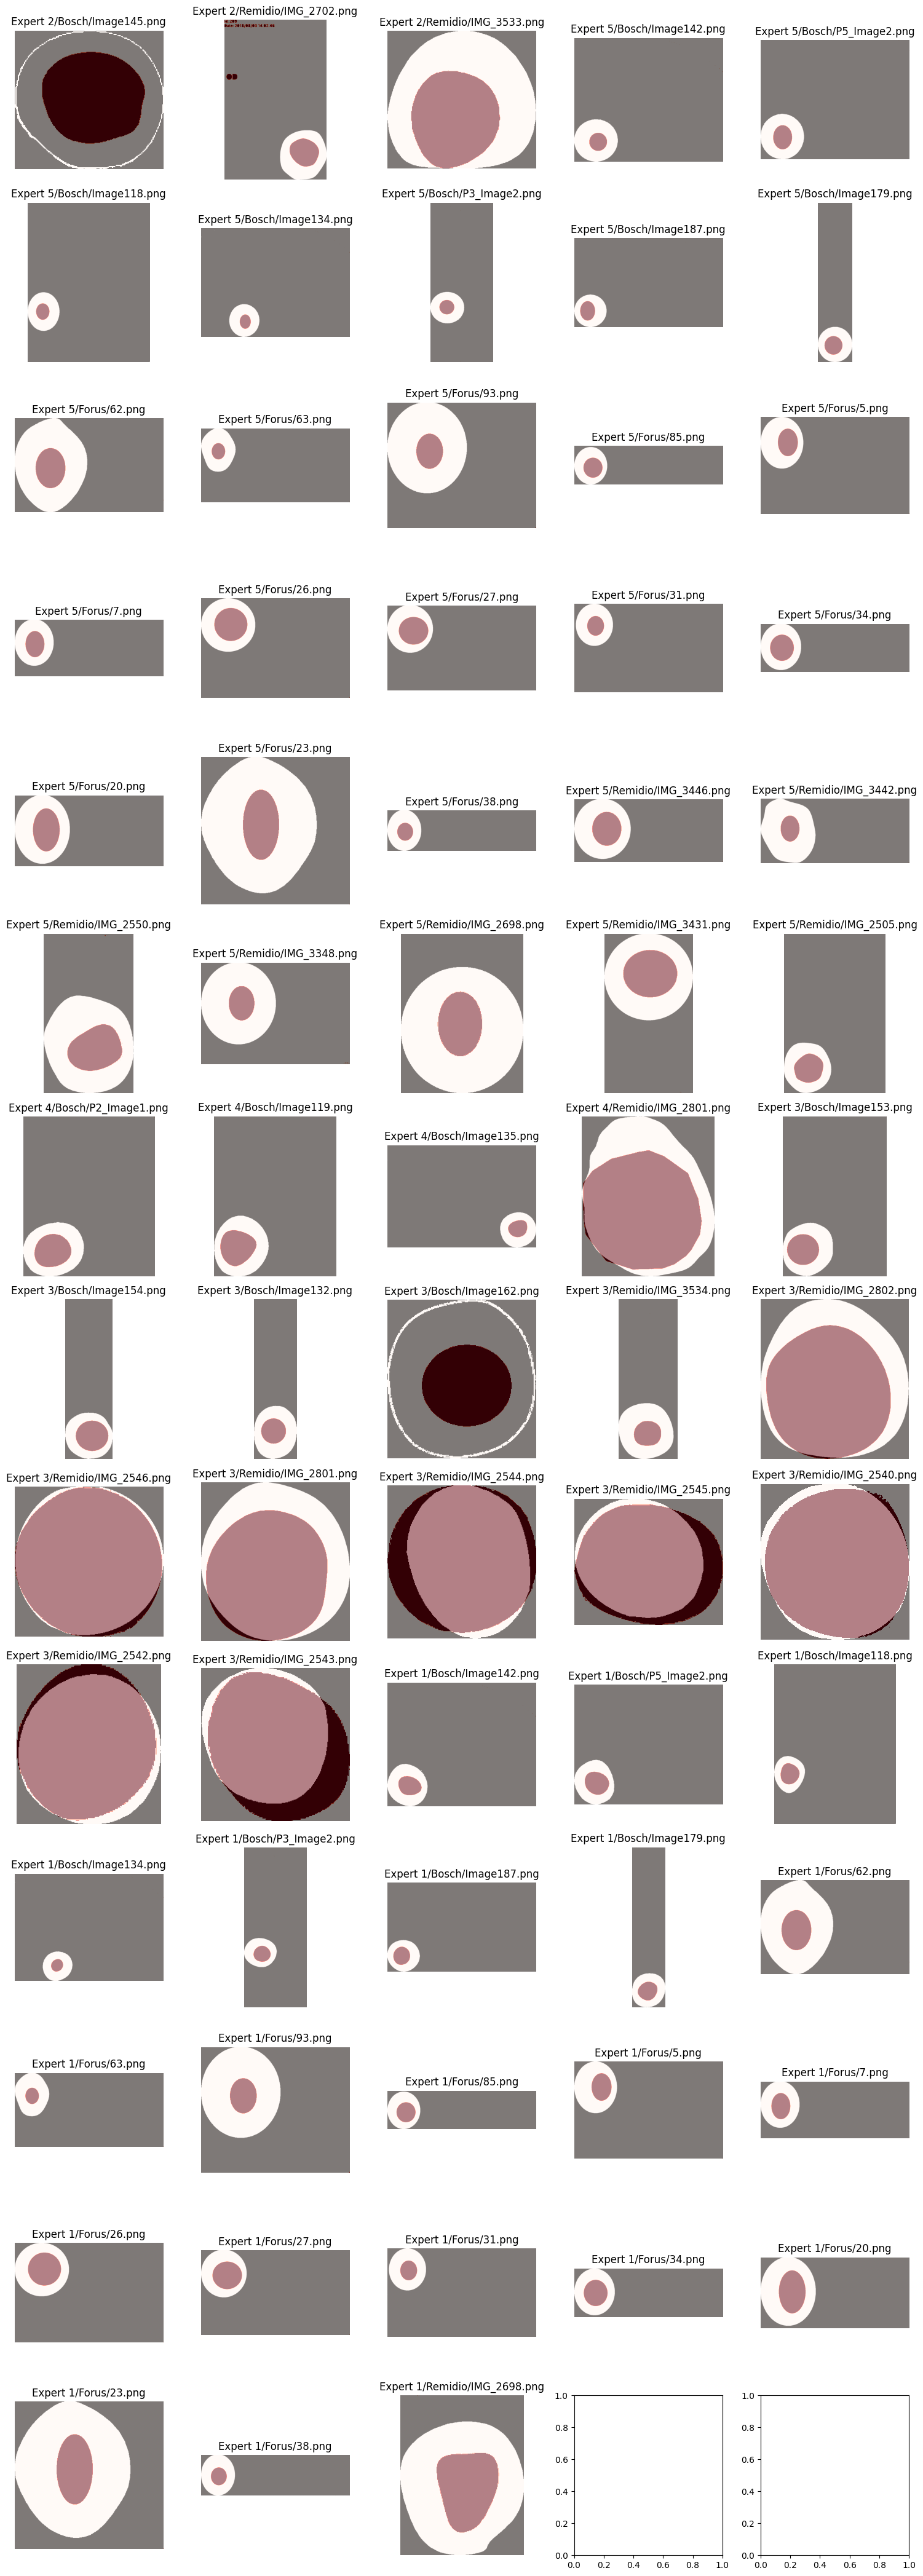

In [71]:
#show nonzero crop of all images

n_images = len(broken_images["cup"])
n_cols = 5
n_rows = (n_images + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3 * n_rows))
for i in range(n_images):
    cup = broken_images["cup"][i]
    disc = broken_images["disc"][i]
    #get nonzero crop
    ys, xs = np.nonzero(disc)
    y_min, y_max = ys.min(), ys.max()
    x_min, x_max = xs.min(), xs.max()
    ys, xs = np.nonzero(cup)
    y_min_cup, y_max_cup = ys.min(), ys.max()
    x_min_cup, x_max_cup = xs.min(), xs.max()
    y_min = min(y_min, y_min_cup)
    y_max = max(y_max, y_max_cup)
    x_min = min(x_min, x_min_cup)
    x_max = max(x_max, x_max_cup)
    cup = cup[y_min:y_max+1, x_min:x_max+1]
    disc = disc[y_min:y_max+1, x_min:x_max+1]
    if n_rows == 1:
        ax = axes[i % n_cols]
    else:
        ax = axes[i // n_cols, i % n_cols]
    ax.imshow(disc, cmap="gray")
    ax.imshow(cup, cmap="Reds", alpha=0.5)
    ax.set_title(f"{broken_images['expert_name'][i]}/{broken_images['machine'][i]}/{broken_images['file_name'][i]}")
    ax.axis("off")
plt.tight_layout()
plt.show()

In [4]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import tqdm
import numpy as np
p = "/data/chaksu/Train/3.0_Doctors_Annotations_Binary_OD_OC"
broken_images = {"machine": [],"expert_name": [],"file_name": [],"cup": [],"disc": []}
machines = ["Bosch","Forus","Remidio"]
for expert_name in os.listdir(p):
    if not "Expert" in expert_name:
        continue
    for machine in machines:
        files = os.listdir(os.path.join(p, expert_name, machine, "Cup"))
        for f in tqdm.tqdm(files):
            if not f.endswith(".png"):
                continue
            cup = np.array(Image.open(os.path.join(p, expert_name, machine, "Cup", f)))
            disc = np.array(Image.open(os.path.join(p, expert_name, machine, "Disc", f)))
            if cup.ndim==3:
                cup = cup[:,:,0]
            if disc.ndim==3:
                disc = disc[:,:,0]
            # if image contains more than 1 connected component in cup or disc, and the largest component is less than 80% of the total area, mark as broken
            criterion_met = is_broken(cup) or is_broken(disc)
            if criterion_met:
                print(f"Error in {expert_name}/{machine}/{f}")
                broken_images["machine"].append(machine)
                broken_images["expert_name"].append(expert_name)
                broken_images["file_name"].append(f)
                broken_images["cup"].append(cup)
                broken_images["disc"].append(disc)

  0%|          | 0/105 [00:00<?, ?it/s]


NameError: name 'is_broken' is not defined

In [67]:
cup.max(), disc.max()


(255, 255)

In [3]:
image_sizes = {"Bosch": set(), "Forus": set(), "Remidio": set()}
p = "/data/chaksu/Train/1.0_Original_Fundus_Images"
circle_widths = {"Bosch": 1440, "Forus": 1900, "Remidio": 2200}
for machine in image_sizes.keys():
    machine_path = os.path.join(p, machine)
    for file_name in os.listdir(machine_path):
        if not (file_name.endswith(".jpg") or file_name.endswith(".png")):
            continue
        image_path = os.path.join(machine_path, file_name)
        image = Image.open(image_path)
        image_sizes[machine].add(image.size)
print(image_sizes)

NameError: name 'Image' is not defined

In [30]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import tqdm
import numpy as np
circle_widths = {"Bosch": 1440, "Forus": 1900, "Remidio": 2200}
bbox_sizes = {"Bosch": [], "Forus": [], "Remidio": []}
only_largest_cc = True
large_bois = []
p = "/data/chaksu/Train/3.0_Doctors_Annotations_Binary_OD_OC"
for expert_name in os.listdir(p):
    if not "Expert" in expert_name:
        continue
    for machine, sizes in image_sizes.items():
        #load all files and save bounding box sizes
        files = os.listdir(os.path.join(p, expert_name, machine, "Disc"))
        for f in tqdm.tqdm(files):
            if not f.endswith(".png"):
                continue
            disc = np.array(Image.open(os.path.join(p, expert_name, machine, "Disc", f)))
            if disc.ndim==3:
                disc = disc[:,:,0]
            if only_largest_cc:
                labeled_array, num_features = label(disc==255)
                if num_features > 1:
                    largest_cc = 0
                    largest_area = 0
                    for i in range(1, num_features+1):
                        area = np.sum(labeled_array==i)
                        if area > largest_area:
                            largest_area = area
                            largest_cc = i
                    disc = np.where(labeled_array==largest_cc, 255, 0)
            ys, xs = np.nonzero(disc)
            y_min, y_max = ys.min(), ys.max()
            x_min, x_max = xs.min(), xs.max()
            bbox_height = y_max - y_min + 1
            bbox_width = x_max - x_min + 1
            bbox_sizes[machine].append((bbox_width, bbox_height))
            if bbox_width / circle_widths[machine] > 0.3 and machine=="Remidio":
                large_bois.append({"expert_name": expert_name, "file_name": f})


100%|██████████| 811/811 [00:41<00:00, 19.57it/s]


In [32]:
large_bois[i]['file_name']

'IMG_2802.png'

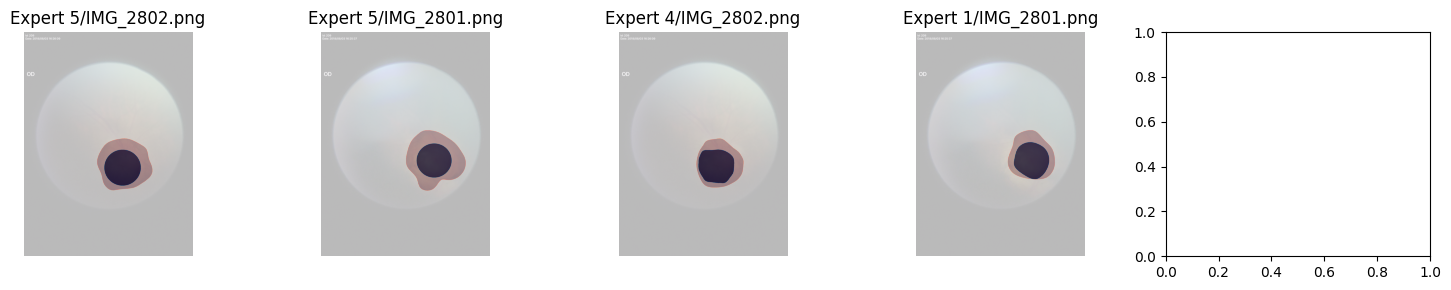

In [33]:
#plot all images in large bois
n = len(large_bois)
n_cols = 5
n_rows = (n + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3 * n_rows))
for i in range(n):
    disc = np.array(Image.open(os.path.join(p, large_bois[i]["expert_name"], "Remidio", "Disc", large_bois[i]["file_name"])))
    cup = np.array(Image.open(os.path.join(p, large_bois[i]["expert_name"], "Remidio", "Cup", large_bois[i]["file_name"])))
    image = np.array(Image.open(os.path.join("/data/chaksu/Train/1.0_Original_Fundus_Images/Remidio", large_bois[i]["file_name"].replace(".png", ".JPG"))))
    #show red and blue overlays as masks on gray image
    if n_rows == 1:
        ax = axes[i % n_cols]
    else:
        ax = axes[i // n_cols, i % n_cols]
    ax.imshow(image, cmap="gray")
    ax.imshow(disc, cmap="Reds", alpha=0.5)
    ax.imshow(cup, cmap="Blues", alpha=0.5)
    ax.set_title(f"{large_bois[i]['expert_name']}/{large_bois[i]['file_name']}")
    ax.axis("off")
plt.tight_layout()
plt.show()

In [ ]:
/home/jloch/Desktop/diff/luzern/values_datasets/chaksu128/preprocessed/images/t_000000.npy
/home/jloch/Desktop/diff/luzern/values_datasets/chaksu128/preprocessed/images/t_000086.npy

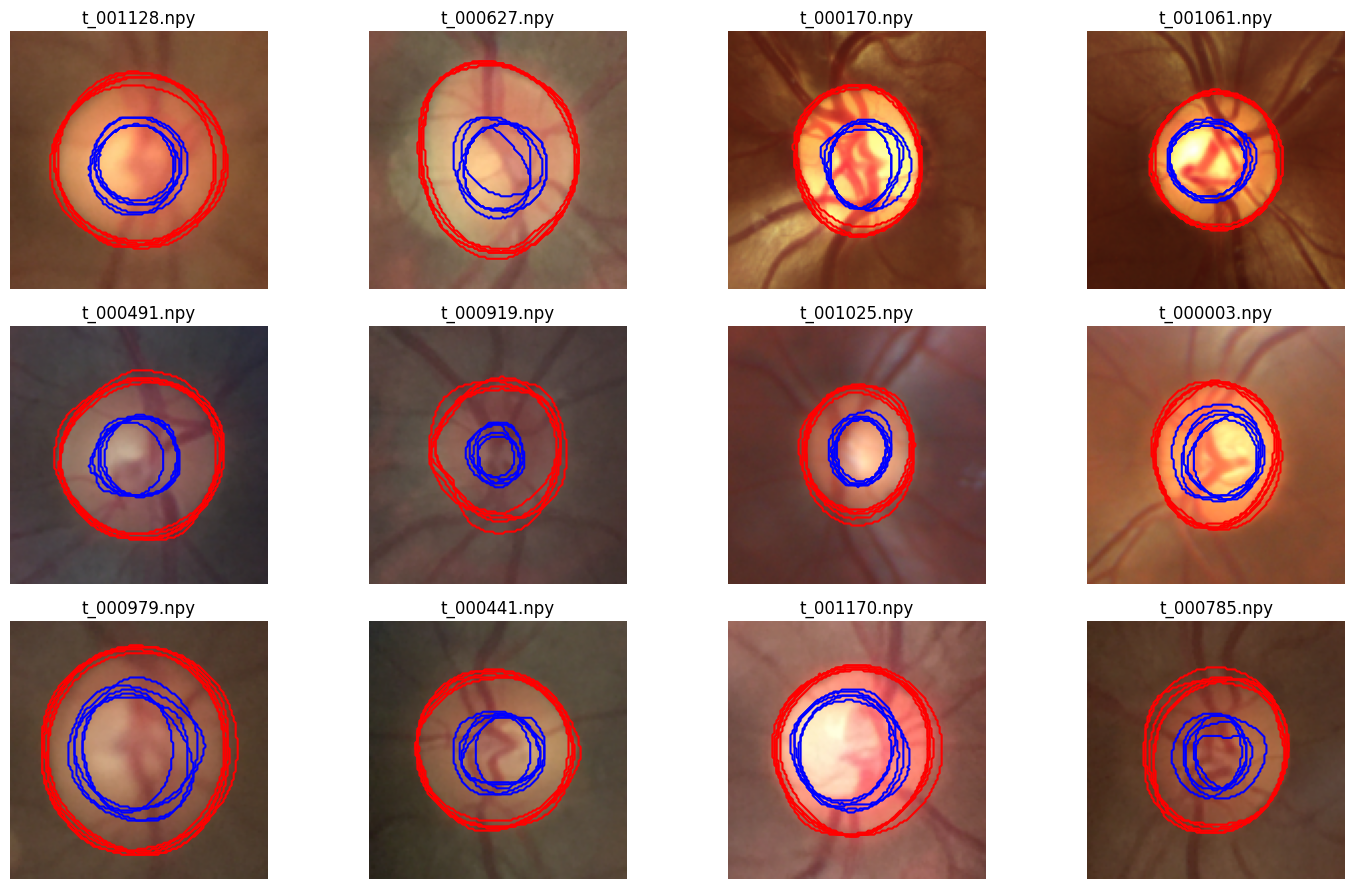

In [58]:
#show preprocessed images and masks 
p_im = "/home/jloch/Desktop/diff/luzern/values_datasets/chaksu128/preprocessed/images"
n = 12
#select n random images from the folder
import random
random_files = random.sample(os.listdir(p_im), n)
n_cols = 4
n_rows = (n + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3 * n_rows))
for i, file_name in enumerate(random_files):
    filename = os.path.join(p_im, file_name)
    image = np.load(filename)
    for random_expert in range(5):
        mask = np.load(filename.replace("images","labels").replace(".npy",f"_{random_expert:02d}_mask.npy"))
        if n_rows == 1:
            ax = axes[i % n_cols]
        else:
            ax = axes[i // n_cols, i % n_cols]
        ax.imshow(image, cmap="gray")
        #ax.imshow(mask, cmap="Reds", alpha=0.5)
        plot_contours = [0.5,1.5]
        ax.contour(mask, levels=plot_contours, colors=["red","blue"])
        ax.set_title(f"{file_name}")
        ax.axis("off")
plt.tight_layout()
plt.show() 

In [2]:
p = "/home/jloch/Desktop/diff/luzern/values_datasets/chaksu64/preprocessed/metadata.csv"
import pandas as pd
metadata = pd.read_csv(p)
print(metadata.head())

                 bbox_cup                bbox_disc  crop_size    image_file  \
0   (884, 1044, 819, 980)   (845, 1075, 780, 1026)        432  t_000000.npy   
1    (561, 700, 772, 910)     (518, 750, 717, 959)        432  t_000001.npy   
2  (1097, 1239, 808, 976)  (1062, 1291, 748, 1028)        432  t_000002.npy   
3    (693, 847, 784, 943)     (658, 875, 744, 993)        432  t_000003.npy   
4  (1197, 1323, 723, 861)   (1165, 1363, 682, 914)        432  t_000004.npy   

                                         label_files machine sample_id  \
0  t_000000_00_mask.npy,t_000000_01_mask.npy,t_00...   Bosch  t_000000   
1  t_000001_00_mask.npy,t_000001_01_mask.npy,t_00...   Bosch  t_000001   
2  t_000002_00_mask.npy,t_000002_01_mask.npy,t_00...   Bosch  t_000002   
3  t_000003_00_mask.npy,t_000003_01_mask.npy,t_00...   Bosch  t_000003   
4  t_000004_00_mask.npy,t_000004_01_mask.npy,t_00...   Bosch  t_000004   

                                        source_image  split  
0  /data/chaksu/Tr

In [5]:
machines = metadata["machine"].unique()
# Scanner all (train/test)
for machine in machines:
    subset = metadata[metadata["machine"]==machine]
    train = len(subset[subset['split']=='train'])
    test = len(subset[subset['split']=='test'])
    all = train+test
    print(f"Scanner {machine}: {all} ({train}/{test}) {train/all:.3f}")

Scanner Bosch: 145 (104/41) 0.717
Scanner Forus: 126 (95/31) 0.754
Scanner Remidio: 1074 (810/264) 0.754


In [71]:
row["label_files"]

'["t_000070_00_mask.npy", "t_000070_01_mask.npy", "t_000070_02_mask.npy", "t_000070_03_mask.npy", "t_000070_04_mask.npy"]'

In [78]:
x_min, x_max, y_min, y_max

('836', ' 1141', ' 772', ' 1087')

            bbox_cup          bbox_disc  crop_size    image_file  \
0  (30, 97, 28, 100)  (30, 97, 28, 100)        432  t_000000.npy   
1   (30, 98, 28, 99)   (30, 98, 28, 99)        432  t_000001.npy   
2  (30, 97, 23, 105)  (30, 97, 23, 105)        432  t_000002.npy   
3  (32, 96, 27, 100)  (32, 96, 27, 100)        432  t_000003.npy   
4   (35, 93, 30, 98)   (35, 93, 30, 98)        432  t_000004.npy   

                                         label_files machine sample_id  \
0  t_000000_00_mask.npy,t_000000_01_mask.npy,t_00...   Bosch  t_000000   
1  t_000001_00_mask.npy,t_000001_01_mask.npy,t_00...   Bosch  t_000001   
2  t_000002_00_mask.npy,t_000002_01_mask.npy,t_00...   Bosch  t_000002   
3  t_000003_00_mask.npy,t_000003_01_mask.npy,t_00...   Bosch  t_000003   
4  t_000004_00_mask.npy,t_000004_01_mask.npy,t_00...   Bosch  t_000004   

                                        source_image  split  
0  /data/chaksu/Train/1.0_Original_Fundus_Images/...  train  
1  /data/chaksu/Train/

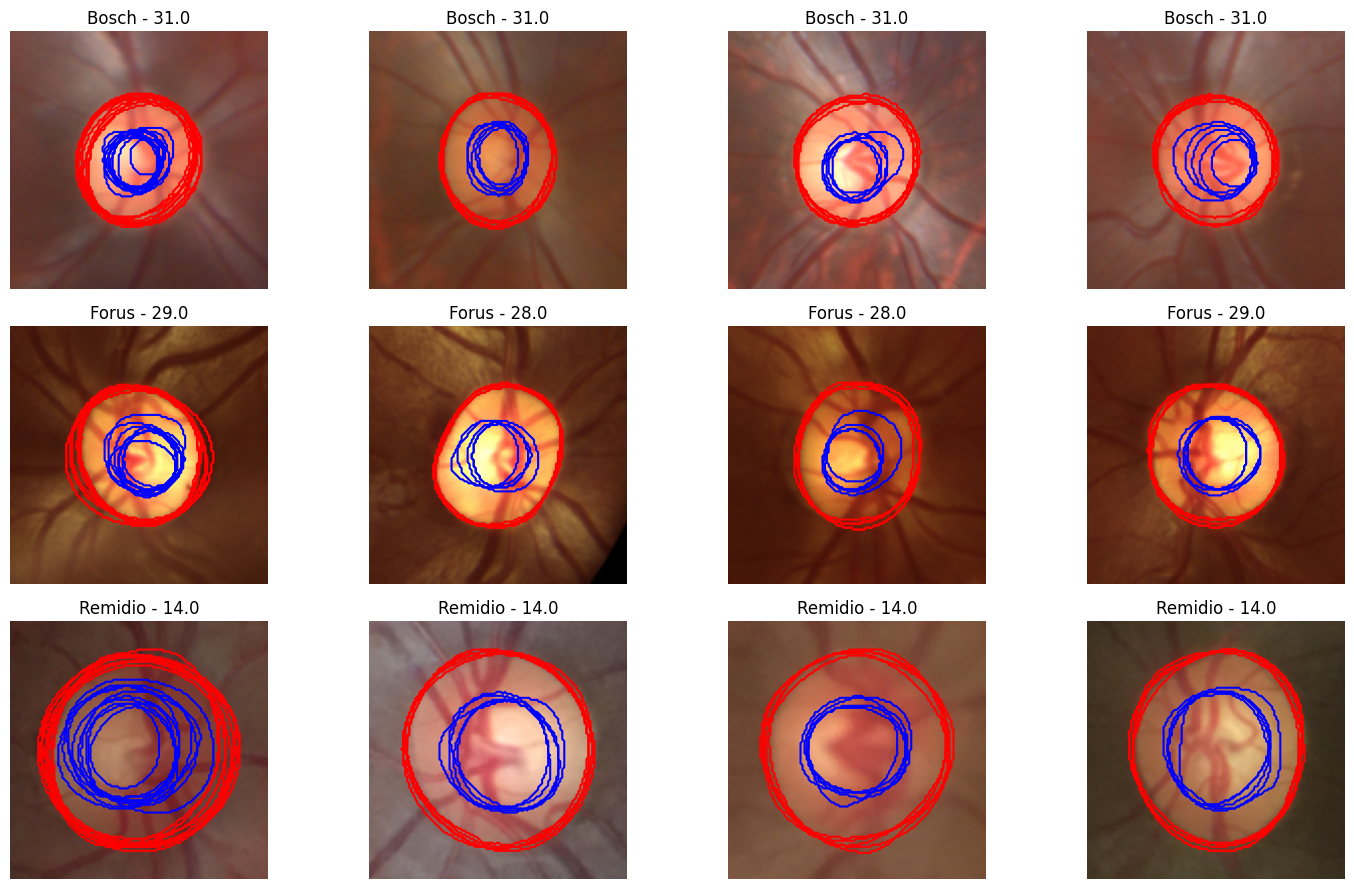

In [84]:
# show top n images with largest bbox_disc area
p = "/home/jloch/Desktop/diff/luzern/values_datasets/chaksu128/preprocessed/metadata.csv"
import pandas as pd
from pathlib import Path
metadata = pd.read_csv(p)
print(metadata.head())
n = 4
d = int(p.split("chaksu")[1].split("/")[0])
machines = metadata["machine"].unique()
fig,axs = plt.subplots(len(machines), n, figsize=(15, 3 * len(machines)))
for machine in machines:
    dists = [] # minimum distance from circle to image border
    for i, row in metadata[metadata["machine"]==machine].iterrows():
        x_min, x_max, y_min, y_max = row["bbox_disc"].strip("()").split(",")
        dists.append(min(int(x_min), int(y_min), d-int(x_max), d-int(y_max)))
    for i,ii in enumerate(np.argsort(dists)[100:105]):
        row = metadata[metadata["machine"]==machine].iloc[ii]

        image = np.load(Path(p).parent / "images" / row["image_file"])
        if len(machines) == 1:
            ax = axs[i % n]
        else:
            ax = axs[list(machines).index(machine), i % n]
        ax.imshow(image, cmap="gray")
        plot_contours = [0.5,1.5]
        for i in range(5):

            mask = np.load(Path(p).parent / "labels" / row["label_files"].split(",")[i].replace(".json", f"_{0:02d}_mask.npy"))
            ax.contour(mask, levels=plot_contours, colors=["red","blue"])
        ax.set_title(f"{row['machine']} - {dists[ii]:.1f}")
        ax.axis("off")
plt.tight_layout()
plt.show()

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd
from pathlib import Path

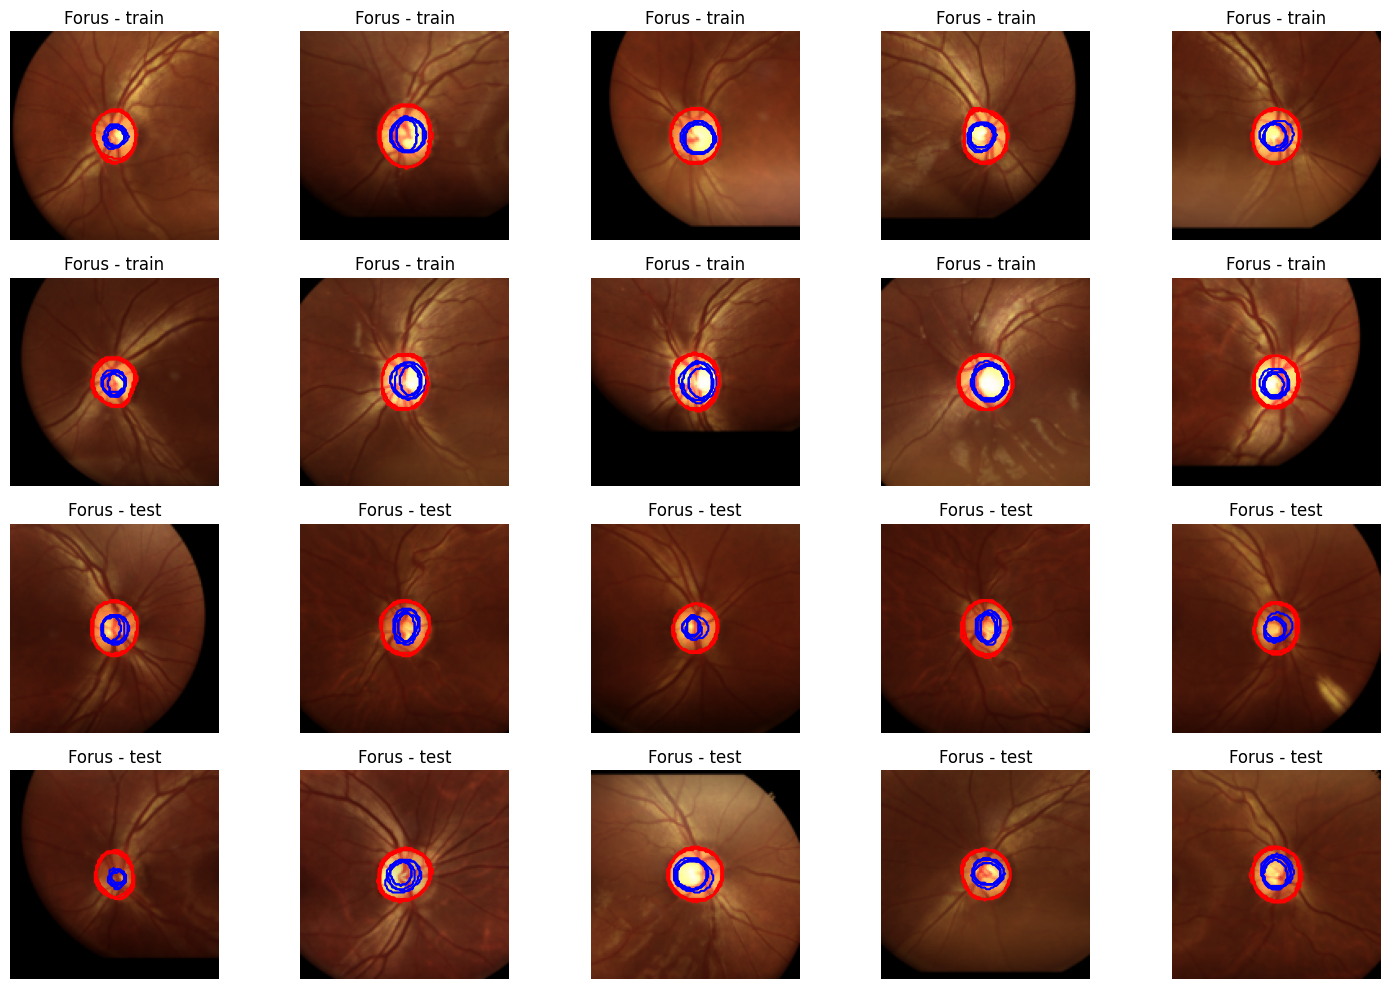

In [55]:
# show 10 random images from one group and compare with 10 random images from another group
group1 = ("Forus","train")
group2 = ("Forus","test")
p = "/home/jloch/Desktop/diff/luzern/values_datasets/chaksu128/preprocessed/metadata.csv"
n = 10
metadata = pd.read_csv(p)
files_group1 = metadata[(metadata["machine"]==group1[0]) & (metadata["split"]==group1[1])]["image_file"].tolist()
files_group2 = metadata[(metadata["machine"]==group2[0]) & (metadata["split"]==group2[1])]["image_file"].tolist()
random_files_group1 = random.sample(files_group1, n)
random_files_group2 = random.sample(files_group2, n)
fig,axs = plt.subplots(4, n//2, figsize=(15, 10))
#first two rows is group1, last two rows is group2
for i in range(n):  
    ax1 = axs[i//(n//2), i%(n//2)]
    ax2 = axs[i//(n//2)+2, i%(n//2)]
    row1 = metadata[metadata["image_file"]==random_files_group1[i]].iloc[0]
    image1 = np.load(Path(p).parent / "images" / row1["image_file"])
    ax1.imshow(image1, cmap="gray")
    plot_contours = [0.5,1.5]
    for j in range(5):
        mask1 = np.load(Path(p).parent / "labels" / row1["label_files"].split(",")[j].replace(".json", f"_{0:02d}_mask.npy"))
        ax1.contour(mask1, levels=plot_contours, colors=["red","blue"])
    ax1.set_title(f"{row1['machine']} - {row1['split']}")
    ax1.axis("off")
    
    row2 = metadata[metadata["image_file"]==random_files_group2[i]].iloc[0]
    image2 = np.load(Path(p).parent / "images" / row2["image_file"])

    ax2.imshow(image2, cmap="gray")
    for j in range(5):
        mask2 = np.load(Path(p).parent / "labels" / row2["label_files"].split(",")[j].replace(".json", f"_{0:02d}_mask.npy"))
        ax2.contour(mask2, levels=plot_contours, colors=["red","blue"])
    ax2.set_title(f"{row2['machine']} - {row2['split']}")
    ax2.axis("off")
plt.tight_layout()
plt.show()

Bosch median bbox size: (0.14652777777777778, 0.15555555555555556)
Forus median bbox size: (0.15578947368421053, 0.17842105263157895)
Remidio median bbox size: (0.1859090909090909, 0.1990909090909091)


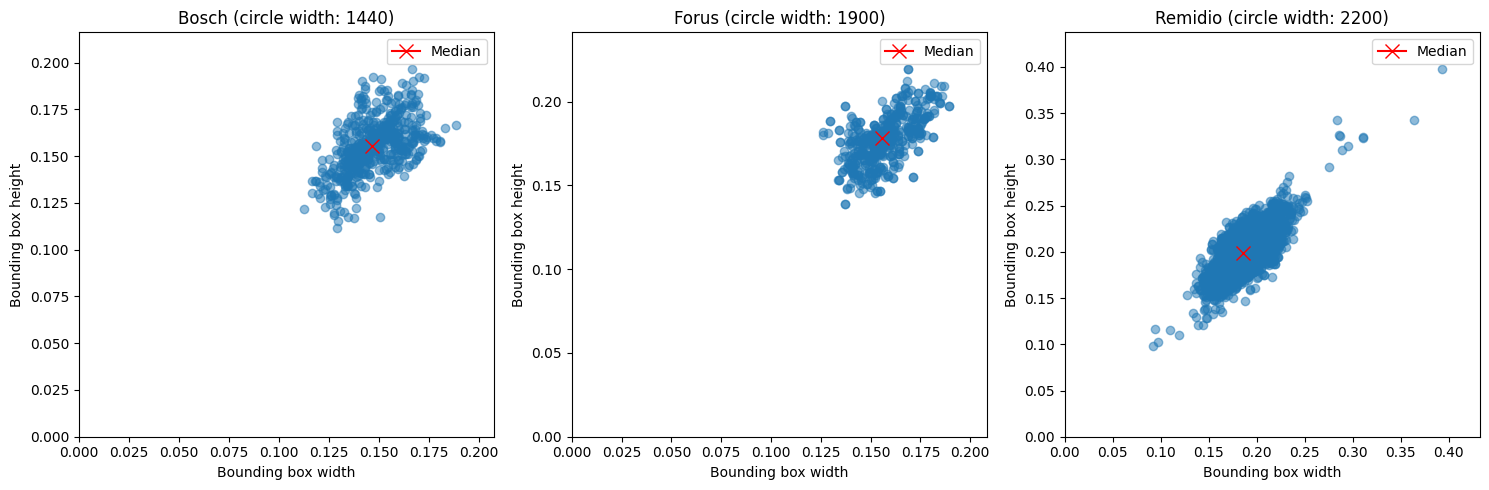

In [7]:
fig,axes = plt.subplots(1,3,figsize=(15,5))
normalize = True
medians = []
for i,(machine,sizes) in enumerate(bbox_sizes.items()):
    n = circle_widths[machine] if normalize else 1
    widths = [s[0]/n for s in sizes]
    heights = [s[1]/n for s in sizes]
    axes[i].scatter(widths, heights, alpha=0.5)
    axes[i].set_title(f"{machine} (circle width: {circle_widths[machine]})")
    axes[i].set_xlabel("Bounding box width")
    axes[i].set_ylabel("Bounding box height")
    axes[i].set_xlim(0, max(widths)*1.1)
    axes[i].set_ylim(0, max(heights)*1.1)
    median_x = np.median(widths)
    median_y = np.median(heights)
    medians.append((median_x, median_y))
    axes[i].plot(median_x, median_y, color="red", marker="x", markersize=10, label="Median")
    print(f"{machine} median bbox size: ({median_x}, {median_y})")
    axes[i].legend()
medians = np.array(medians)
plt.tight_layout()
plt.show()

In [9]:
import os
n_images = {"Bosch_test": 0, "Forus_test": 0, "Remidio_test": 0,
            "Bosch_train": 0, "Forus_train": 0, "Remidio_train": 0}
p_train = "/data/chaksu/Train/1.0_Original_Fundus_Images"
p_test = "/data/chaksu/Test/1.0_Original_Fundus_Images"
valid_endings = [".jpg", ".png", ".jpeg", ".JPG", ".PNG", ".JPEG"]
for it in n_images.keys():
    machine, split = it.split("_")
    p = p_train if split=="train" else p_test
    machine_path = os.path.join(p, machine)
    for file_name in os.listdir(machine_path):
        if any(file_name.endswith(ext) for ext in valid_endings):
            n_images[it] += 1
print(n_images)
total = sum(n_images.values())
for it, count in n_images.items():
    print(f"{it}: {count} images, {count/total*100:.2f}%")

{'Bosch_test': 41, 'Forus_test': 31, 'Remidio_test': 264, 'Bosch_train': 104, 'Forus_train': 95, 'Remidio_train': 810}
Bosch_test: 41 images, 3.05%
Forus_test: 31 images, 2.30%
Remidio_test: 264 images, 19.63%
Bosch_train: 104 images, 7.73%
Forus_train: 95 images, 7.06%
Remidio_train: 810 images, 60.22%


In [73]:
p = "/home/jloch/Desktop/diff/luzern/values_datasets/lidc_2d/splits/texture/firstCycle/splits.pkl"
import pickle
with open(p, "rb") as f:
    splits = pickle.load(f)[0]
for split_name, split_data in splits.items():
    print(f"{split_name}: {len(split_data)} samples")

train: 3799 samples
val: 950 samples
id_test: 1260 samples
ood_test: 139 samples
id_unlabeled_pool: 323 samples
ood_unlabeled_pool: 151 samples


In [114]:
p = "/home/jloch/Desktop/diff/luzern/values_datasets/chaksu128/splits/scanner/FirstCycle/splits.pkl"
import pickle
with open(p, "rb") as f:
    splits = pickle.load(f)[0]
for split_name, split_data in splits.items():
    print(f"{split_name}: {len(split_data)} samples")

train: 648 samples
val: 162 samples
id_test: 264 samples
ood_test: 271 samples
id_unlabeled_pool: 0 samples
ood_unlabeled_pool: 0 samples


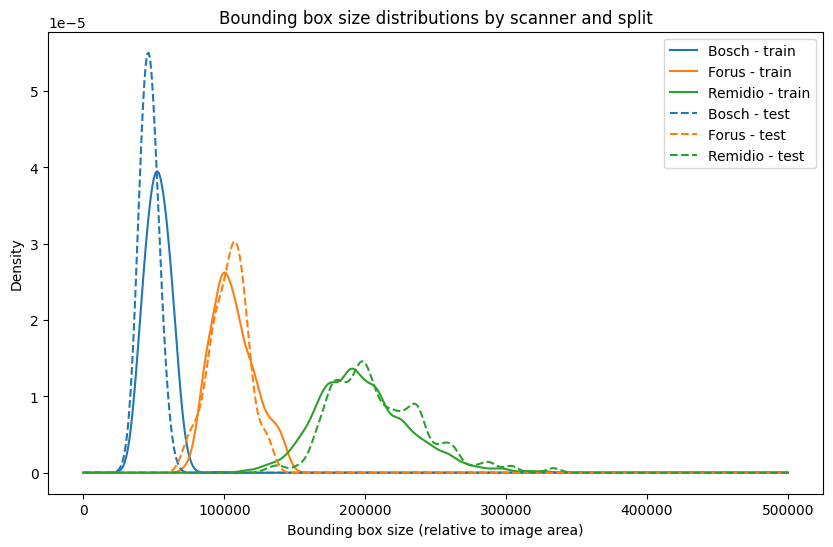

In [57]:
## plot histograms (As lines) for bbox sizes
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
p = "/home/jloch/Desktop/diff/luzern/values_datasets/chaksu128/preprocessed/metadata.csv"
metadata = pd.read_csv(p)
machines = metadata["machine"].unique()

def get_curve_from_samples(samples, xmin, xmax, sample_points, kernel_std):
    # filter with gaussian kernel in the valid interval to get smooth curve
    if any(s < xmin or s > xmax for s in samples):
        print(f"Warning: ratio of samples > xmin: {sum(s < xmin for s in samples)}/{len(samples)}, ratio of samples > xmax: {sum(s > xmax for s in samples)}/{len(samples)}")
    x = np.linspace(xmin, xmax, sample_points)
    curve = np.zeros_like(x)
    for s in samples:
        curve += np.exp(-0.5 * ((x - s) / kernel_std) ** 2) / (kernel_std * np.sqrt(2 * np.pi))
    curve /= np.trapz(curve, x)  # normalize to area 1
    return curve

xmin = 0
xmax = 5e5#16000
sample_points = 1000
kernel_std = xmax/100
plt.figure(figsize=(10,6))
for split in ["train","test"]:
    for machine_i,machine in enumerate(machines):
        areas = []
        for i, row in metadata[(metadata["machine"]==machine) & (metadata["split"]==split)].iterrows():
            x_min, x_max, y_min, y_max = row["orig_bbox_disc"].strip("()").split(",")
            bbox_width = int(x_max) - int(x_min) + 1
            bbox_height = int(y_max) - int(y_min) + 1
            areas.append(bbox_width * bbox_height)
        curve = get_curve_from_samples(areas, xmin, xmax, sample_points, kernel_std)
        plt.plot(np.linspace(xmin, xmax, sample_points), curve, label=f"{machine} - {split}", color=f"C{machine_i}", linestyle="-" if split=="train" else "--")
plt.xlabel("Bounding box size (relative to image area)")
plt.ylabel("Density")
plt.title("Bounding box size distributions by scanner and split")
plt.legend()
plt.show()

In [61]:
#find mean disc disc radius per machine based on bbox sides
disc_crop_radius = 1.5
rad_per_machine = {}
for machine_i,machine in enumerate(machines):
    rads = []
    for i, row in metadata[metadata["machine"]==machine].iterrows():
        x_min, x_max, y_min, y_max = row["orig_bbox_disc"].strip("()").split(",")
        rads.append((int(x_max) - int(x_min) + 1)/2 + (int(y_max) - int(y_min) + 1)/2)
    rad_per_machine[machine] = sum(rads)/len(rads)
    print(f"Ratio of rads above {disc_crop_radius*rad_per_machine[machine]} for machine {machine}: {sum(r > disc_crop_radius*rad_per_machine[machine] for r in rads)}/{len(rads)}")
rad_per_machine

Ratio of rads above 337.93965517241384 for machine Bosch: 0/145
Ratio of rads above 487.5297619047619 for machine Forus: 0/126
Ratio of rads above 672.0712290502793 for machine Remidio: 2/1074


{'Bosch': 225.29310344827587,
 'Forus': 325.01984126984127,
 'Remidio': 448.04748603351953}

In [43]:
max(areas)

334506

min(areas)

In [31]:
row["orig_bbox_disc"]

'(682, 1085, 742, 1158)'